In [26]:
#Import libraries

from sklearn import metrics
import pandas as pd
import numpy as np
from pyparsing import col
from requests import head
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from torch import rand
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
#Read in data 

#User data
df = pd.read_csv('udata.txt', sep='\t', header=None)
df.columns = ['user_id', 'item_id', 'rating', 'timestamp']

#Users
users = pd.read_csv('uuser.txt', sep='|', header=None)
users.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

#genre data
genre = pd.read_csv('ugenre.txt', sep='|', header=None)
genre.columns = ['genre', 'genre_id']

#occupation data
job = pd.read_csv('uoccupation.txt', sep='|', header=None)
job.columns = ['occupation']
job = job.reset_index().rename(columns={'index': 'job'})

#other items
items = pd.read_csv('uitem.txt', sep='|', header=None)
items.columns = ['movie_id', 'movie_title', 'video_release_date', 'imdb_url', 'unknown', 'Action', 'Adventure', 'Animation','Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western']

In [3]:
#Combine/clean data

data = df.merge(users, how='left', on = 'user_id').merge(job, how = 'left', on='occupation').merge(items, how='left', left_on='item_id', right_on='movie_id')
data[data.Western.isna()]
data = data[data.Western.notna()].astype({'Western': 'int'})
data.gender.unique()
data['gender_id'] = np.where(data.gender == 'M', 0, 1)


Text(0.5, 1.0, 'Rating Distribution')

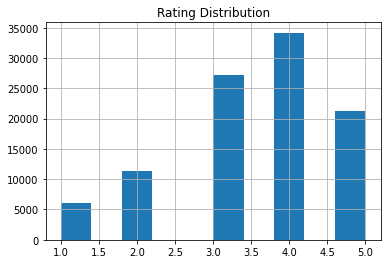

In [65]:
#Look at response variable distribution
data.hist(column = 'rating')
plt.title("Rating Distribution")

Text(0.5, 1.0, 'Age Distribution')

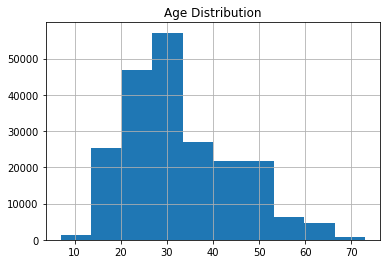

In [72]:
#Glance at other distributions

data.hist(column = 'age')
plt.title("Age Distribution")

In [9]:
#Convert to long format data for genre for correlation analysis

dataLong = pd.melt(data, id_vars = ['user_id', 'item_id', 'rating', 'timestamp', 'age', 'gender',
                        'occupation', 'zip_code', 'job', 'movie_id', 'movie_title','video_release_date', 'imdb_url',
                               'gender_id'],
        var_name = "genre",
       value_name = "values")
dataLong = dataLong.loc[dataLong['values'] == 1]
dataLong = dataLong.drop("values", 1)

correlation_matrix = dataLong.corr()
correlation_matrix

,user_id,item_id,rating,timestamp,age,job,movie_id,gender_id
user_id,1.000000,0.007786,-0.009345,0.017033,-0.075986,0.104361,0.007786,0.028086
item_id,0.007786,1.000000,-0.183815,0.044195,-0.001901,0.000972,1.000000,0.032098
rating,-0.009345,-0.183815,1.000000,-0.018312,0.047199,-0.027173,-0.183815,-0.000223
timestamp,0.017033,0.044195,-0.018312,1.000000,0.153953,0.027172,0.044195,0.035340
age,-0.075986,-0.001901,0.047199,0.153953,1.000000,-0.369569,-0.001901,-0.033479
job,0.104361,0.000972,-0.027173,0.027172,-0.369569,1.000000,0.000972,-0.015315
movie_id,0.007786,1.000000,-0.183815,0.044195,-0.001901,0.000972,1.000000,0.032098
gender_id,0.028086,0.032098,-0.000223,0.035340,-0.033479,-0.015315,0.032098,1.000000


In [24]:
# split into train/test for kNN

features = ['rating', 'age', 'gender_id', 'job', 'unknown', 'Action', 'Adventure', 'Animation','Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western']

data_x = data[features].drop(columns=['rating'])
data_y = data[['rating']]

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.33, random_state=123)



In [23]:
test_x

,rating
26255,4
32645,5
89609,1
54877,5
31903,4
...,...
63213,4
61411,4
17736,4
28036,4


In [27]:
# knn regression

errors = list()
for i in range(1,10):
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(train_x, train_y)

    test_preds = knn_model.predict(test_x)
    mse = mean_squared_error(test_y, test_preds)
    errors.append(mse)



1.3737061505411101